In [16]:
# =============================================================================
# BLOC 1: IMPORTATION ET EXPLORATION DES DONNÉES
# Objectif: Charger et explorer tous les datasets disponibles
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

print("🔍 CHARGEMENT ET EXPLORATION DES DONNÉES")

# Chargement de tous les datasets
df_category = pd.read_csv("dataset/product_category_name_translation.csv")
df_sellers = pd.read_csv("dataset/olist_sellers_dataset.csv")
df_products = pd.read_csv("dataset/olist_products_dataset.csv")
df_orders = pd.read_csv("dataset/olist_orders_dataset.csv")
df_reviews = pd.read_csv("dataset/olist_order_reviews_dataset.csv")
df_payments = pd.read_csv("dataset/olist_order_payments_dataset.csv")
df_order_items = pd.read_csv("dataset/olist_order_items_dataset.csv")
df_geolocation = pd.read_csv("dataset/olist_geolocation_dataset.csv")
df_customers = pd.read_csv("dataset/olist_customers_dataset.csv")

# Affichage des informations de base pour chaque dataset
datasets = {
    "product_category_name_translation": df_category,
    "olist_sellers_dataset": df_sellers,
    "olist_products_dataset": df_products,
    "olist_orders_dataset": df_orders,
    "olist_order_reviews_dataset": df_reviews,
    "olist_order_payments_dataset": df_payments,
    "olist_order_items_dataset": df_order_items,
    "olist_geolocation_dataset": df_geolocation,
    "olist_customers_dataset": df_customers
}

for name, dataset in datasets.items():
    print(f"\n{'='*50}")
    print(f"📊 {name.upper()}")
    print(f"{'='*50}")
    print(f"Shape: {dataset.shape}")
    print(f"Colonnes: {list(dataset.columns)}")
    print("\nAperçu des données:")
    print(dataset.head(3))
    print("\nInfos:")
    print(dataset.info())

🔍 CHARGEMENT ET EXPLORATION DES DONNÉES

📊 PRODUCT_CATEGORY_NAME_TRANSLATION
Shape: (71, 2)
Colonnes: ['product_category_name', 'product_category_name_english']

Aperçu des données:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto

Infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

📊 OLIST_SELLERS_DATASET
Shape: (3095, 4)
Colonnes: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

Aperçu des données:
                          seller_id  seller_zip_code_prefix

In [17]:
# =============================================================================
# BLOC 2: NETTOYAGE DES DONNÉES
# Objectif: Nettoyer les valeurs manquantes et incohérences
# =============================================================================

import pandas as pd
import os

print("🧹 NETTOYAGE DES DONNÉES")

# Liste des fichiers à nettoyer
files = [
    "olist_orders_dataset.csv", "olist_products_dataset.csv", 
    "olist_sellers_dataset.csv", "olist_customers_dataset.csv",
    "olist_order_items_dataset.csv", "olist_order_payments_dataset.csv", 
    "olist_order_reviews_dataset.csv", "product_category_name_translation.csv",
    "olist_geolocation_dataset.csv"
]

# Chargement dans un dictionnaire
datasets = {}
for f in files:
    try:
        datasets[f] = pd.read_csv(os.path.join("dataset", f))
        print(f"✅ {f} chargé - {len(datasets[f])} lignes")
    except Exception as e:
        print(f"❌ Erreur avec {f}: {e}")

# Fonction de nettoyage améliorée
def clean_dataset(df, dataset_name):
    """
    Nettoie un dataset en gérant les valeurs manquantes
    """
    print(f"\n🔧 Nettoyage de {dataset_name}")
    
    # Supprimer les lignes complètement vides
    initial_count = len(df)
    df = df.dropna(how='all')
    removed_count = initial_count - len(df)
    if removed_count > 0:
        print(f"   📝 {removed_count} lignes vides supprimées")
    
    # Traitement colonne par colonne
    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            if df[col].dtype in ['int64', 'float64']:
                # Colonnes numériques: remplacer par la moyenne
                mean_val = df[col].mean()
                df[col] = df[col].fillna(mean_val)
                print(f"   🔢 {col}: {null_count} NaN → moyenne ({mean_val:.2f})")
            else:
                # Colonnes texte: remplacer par 'missing'
                df[col] = df[col].fillna('missing')
                print(f"   🔤 {col}: {null_count} NaN → 'missing'")
    
    return df

# Application du nettoyage
for name, df in datasets.items():
    datasets[name] = clean_dataset(df, name)

print("\n🎉 Tous les datasets ont été nettoyés!")

🧹 NETTOYAGE DES DONNÉES
✅ olist_orders_dataset.csv chargé - 99441 lignes
✅ olist_products_dataset.csv chargé - 32951 lignes
✅ olist_sellers_dataset.csv chargé - 3095 lignes
✅ olist_customers_dataset.csv chargé - 99441 lignes
✅ olist_order_items_dataset.csv chargé - 112650 lignes
✅ olist_order_payments_dataset.csv chargé - 103886 lignes
✅ olist_order_reviews_dataset.csv chargé - 100000 lignes
✅ product_category_name_translation.csv chargé - 71 lignes
✅ olist_geolocation_dataset.csv chargé - 1000163 lignes

🔧 Nettoyage de olist_orders_dataset.csv
   🔤 order_approved_at: 160 NaN → 'missing'
   🔤 order_delivered_carrier_date: 1783 NaN → 'missing'
   🔤 order_delivered_customer_date: 2965 NaN → 'missing'

🔧 Nettoyage de olist_products_dataset.csv
   🔤 product_category_name: 610 NaN → 'missing'
   🔢 product_name_lenght: 610 NaN → moyenne (48.48)
   🔢 product_description_lenght: 610 NaN → moyenne (771.50)
   🔢 product_photos_qty: 610 NaN → moyenne (2.19)
   🔢 product_weight_g: 2 NaN → moyenne 

In [18]:
# =============================================================================
# BLOC 3: FEATURE ENGINEERING CORRIGÉ
# Objectif: Créer des features pour prédire la satisfaction client
# =============================================================================

print("⚙️ FEATURE ENGINEERING")

# Extraction des datasets principaux
orders = datasets["olist_orders_dataset.csv"]
order_items = datasets["olist_order_items_dataset.csv"] 
products = datasets["olist_products_dataset.csv"]
reviews = datasets["olist_order_reviews_dataset.csv"]

print(f"📊 Dimensions: Orders{orders.shape}, Items{order_items.shape}, Products{products.shape}, Reviews{reviews.shape}")

# CORRECTION: Nettoyage spécifique des dates dans le dataset orders
print("\n🔧 Correction des colonnes de dates...")

# Colonnes de date à traiter
date_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

# Remplacer 'missing' par NaN pour les colonnes de date
for col in date_columns:
    if col in orders.columns:
        # Compter les 'missing' avant remplacement
        missing_count = (orders[col] == 'missing').sum()
        if missing_count > 0:
            print(f"   📅 {col}: {missing_count} 'missing' → NaN")
            orders[col] = orders[col].replace('missing', np.nan)
        
        # Conversion en datetime avec gestion des erreurs
        orders[col] = pd.to_datetime(orders[col], errors='coerce')

print("✅ Colonnes de dates corrigées")

# Feature 1: Délai de livraison en jours (uniquement pour les commandes livrées)
print("\n📦 Calcul du délai de livraison...")

# Compter les dates de livraison manquantes
missing_delivery = orders['order_delivered_customer_date'].isna().sum()
print(f"   Commandes sans date de livraison: {missing_delivery} ({missing_delivery/len(orders):.1%})")

# Calcul du délai uniquement pour les commandes avec dates complètes
valid_delivery_mask = orders['order_delivered_customer_date'].notna() & orders['order_purchase_timestamp'].notna()
orders.loc[valid_delivery_mask, 'delivery_time_days'] = (
    orders.loc[valid_delivery_mask, 'order_delivered_customer_date'] - 
    orders.loc[valid_delivery_mask, 'order_purchase_timestamp']
).dt.days

# Pour les commandes sans date de livraison, utiliser une valeur par défaut (médiane)
median_delivery = orders['delivery_time_days'].median()
orders['delivery_time_days'] = orders['delivery_time_days'].fillna(median_delivery)
print(f"   Délai médian utilisé pour les valeurs manquantes: {median_delivery:.1f} jours")

# Corriger les valeurs aberrantes (délais négatifs ou trop longs)
initial_outliers = ((orders['delivery_time_days'] < 0) | (orders['delivery_time_days'] > 365)).sum()
orders['delivery_time_days'] = orders['delivery_time_days'].clip(lower=0, upper=365)
print(f"   Valeurs aberrantes corrigées: {initial_outliers}")

# Feature 2: Jour de la semaine de l'achat (0=lundi, 6=dimanche)
orders['purchase_weekday'] = orders['order_purchase_timestamp'].dt.weekday

# Remplacer les NaN dans purchase_weekday (causés par les dates manquantes) par la valeur médiane
orders['purchase_weekday'] = orders['purchase_weekday'].fillna(orders['purchase_weekday'].median())

print("✅ Features temporelles créées")

# Fusion order_items + products
print("\n🔗 Fusion des datasets...")
df = order_items.merge(products, on='product_id', how='left')
print(f"   Après fusion items+produits: {df.shape}")

# Gestion des NaN numériques après fusion
numeric_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in numeric_cols:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)
            print(f"   🔢 {col}: {null_count} NaN → moyenne ({mean_val:.2f})")

# Feature 3: Densité du produit (poids/volume)
print("\n📏 Calcul de la densité des produits...")
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Éviter la division par zéro
df['product_density'] = df['product_weight_g'] / (df['product_volume_cm3'] + 1e-6)

# Gestion des valeurs infinies
infinite_count = (df['product_density'] == np.inf).sum() | (df['product_density'] == -np.inf).sum()
if infinite_count > 0:
    print(f"   Valeurs infinies détectées: {infinite_count}")
    df['product_density'] = df['product_density'].replace([np.inf, -np.inf], np.nan)

# Remplacer les NaN par la médiane
density_median = df['product_density'].median()
df['product_density'] = df['product_density'].fillna(density_median)
print(f"   Densité médiane utilisée: {density_median:.4f}")

# Fusion avec les features temporelles
df = df.merge(orders[['order_id', 'delivery_time_days', 'purchase_weekday']], on='order_id', how='left')
print(f"   Après fusion avec commandes: {df.shape}")

# Fusion avec les reviews (variable cible)
df = df.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')
print(f"   Après fusion avec reviews: {df.shape}")

# Suppression des lignes sans review_score (cible manquante)
initial_rows = len(df)
df = df.dropna(subset=['review_score'])
removed_rows = initial_rows - len(df)
print(f"📝 {removed_rows} lignes sans review_score supprimées ({removed_rows/initial_rows:.1%})")

# Création de la variable cible binaire: 1=satisfait (score≥4), 0=insatisfait
df['target'] = (df['review_score'] >= 4).astype(int)

# Statistiques finales
satisfaction_rate = df['target'].mean()
print(f"\n🎯 DATASET FINAL: {len(df):,} lignes")
print(f"   Taux de satisfaction: {satisfaction_rate:.1%} ({df['target'].sum():,} satisfaits, {(df['target'] == 0).sum():,} insatisfaits)")

print("\n🔍 Aperçu des nouvelles colonnes créées:")
preview_cols = ['delivery_time_days', 'purchase_weekday', 'product_density', 'review_score', 'target']
print(df[preview_cols].head())

# Vérification des valeurs manquantes
print("\n📊 Vérification des valeurs manquantes dans le dataset final:")
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]
if len(missing_cols) > 0:
    for col, count in missing_cols.items():
        print(f"   ⚠️  {col}: {count} valeurs manquantes ({count/len(df):.1%})")
else:
    print("   ✅ Aucune valeur manquante détectée")

⚙️ FEATURE ENGINEERING
📊 Dimensions: Orders(99441, 8), Items(112650, 7), Products(32951, 9), Reviews(100000, 7)

🔧 Correction des colonnes de dates...
   📅 order_approved_at: 160 'missing' → NaN
   📅 order_delivered_carrier_date: 1783 'missing' → NaN
   📅 order_delivered_customer_date: 2965 'missing' → NaN
✅ Colonnes de dates corrigées

📦 Calcul du délai de livraison...
   Commandes sans date de livraison: 2965 (3.0%)
   Délai médian utilisé pour les valeurs manquantes: 10.0 jours
   Valeurs aberrantes corrigées: 0
✅ Features temporelles créées

🔗 Fusion des datasets...
   Après fusion items+produits: (112650, 15)

📏 Calcul de la densité des produits...
   Densité médiane utilisée: 0.1122
   Après fusion avec commandes: (112650, 19)
   Après fusion avec reviews: (113322, 20)
📝 0 lignes sans review_score supprimées (0.0%)

🎯 DATASET FINAL: 113,322 lignes
   Taux de satisfaction: 75.0% (85,007 satisfaits, 28,315 insatisfaits)

🔍 Aperçu des nouvelles colonnes créées:
   delivery_time_days

In [22]:
# =============================================================================
# BLOC 4: PRÉPARATION DES DONNÉES POUR MODÉLISATION
# Objectif: Diviser les données en train/validation/test
# =============================================================================

from sklearn.model_selection import train_test_split

print("📊 PRÉPARATION DES DONNÉES POUR MODÉLISATION")

# Séparation features (X) et target (y)
X = df.drop(columns=['target', 'review_score'])
y = df['target']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Taux de satisfaction: {y.mean():.2%}")

# Division stratifiée: Train (70%), Validation (15%), Test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.15,        # 15% pour test
    random_state=42,       # Reproductibilité
    stratify=y             # Conserve la proportion de la target
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,       # 0.15/0.85 ≈ 0.176 pour avoir 15% de validation
    random_state=42,
    stratify=y_temp
)

print("\n✅ Division des données terminée:")
print(f"   🏋️  Train: {X_train.shape[0]:,} lignes ({len(X_train)/len(X):.1%})")
print(f"   📋 Validation: {X_val.shape[0]:,} lignes ({len(X_val)/len(X):.1%})")
print(f"   🧪 Test: {X_test.shape[0]:,} lignes ({len(X_test)/len(X):.1%})")

print(f"\n📈 Distribution de la target:")
print(f"   Train: {y_train.mean():.2%} satisfaits")
print(f"   Validation: {y_val.mean():.2%} satisfaits") 
print(f"   Test: {y_test.mean():.2%} satisfaits")

📊 PRÉPARATION DES DONNÉES POUR MODÉLISATION
Features (X): (113322, 19)
Target (y): (113322,)
Taux de satisfaction: 75.01%

✅ Division des données terminée:
   🏋️  Train: 79,370 lignes (70.0%)
   📋 Validation: 16,953 lignes (15.0%)
   🧪 Test: 16,999 lignes (15.0%)

📈 Distribution de la target:
   Train: 75.01% satisfaits
   Validation: 75.01% satisfaits
   Test: 75.02% satisfaits


In [23]:
# =============================================================================
# BLOC 5: PRÉPROCESSING AVANCÉ
# Objectif: Préparer les données pour les algorithmes ML
# =============================================================================

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

print("🔧 PRÉPROCESSING AVANCÉ")

# Identification des types de colonnes
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"Colonnes numériques ({len(numeric_cols)}): {numeric_cols}")
print(f"Colonnes catégorielles ({len(categorical_cols)}): {categorical_cols}")

# Fonction pour réduire la cardinalité des variables catégorielles
def reduce_cardinality(df, cat_columns, top_k=20):
    """
    Réduit la cardinalité en gardant les top_k catégories les plus fréquentes
    Les autres catégories sont regroupées dans '__other__'
    """
    df_copy = df.copy()
    for col in cat_columns:
        if col in df_copy.columns:
            top_categories = df_copy[col].value_counts().nlargest(top_k).index
            df_copy[col] = df_copy[col].where(df_copy[col].isin(top_categories), other='__other__')
    return df_copy

# Application de la réduction de cardinalité
X_train = reduce_cardinality(X_train, categorical_cols, top_k=20)
X_val = reduce_cardinality(X_val, categorical_cols, top_k=20)
X_test = reduce_cardinality(X_test, categorical_cols, top_k=20)

print("✅ Cardinalité réduite pour les variables catégorielles")

# Création du préprocesseur avec ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),      # Remplace NaN par moyenne
    ('scaler', StandardScaler())                      # Standardisation
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Remplace NaN par 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Encodage one-hot
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

print("🔧 Préprocesseur créé avec succès!")

# Test du préprocesseur
print("\n🧪 Test du préprocesseur...")
sample_data = X_train.head(10)
preprocessor.fit(sample_data)
transformed_sample = preprocessor.transform(sample_data)
print(f"   Shape après transformation: {transformed_sample.shape}")

🔧 PRÉPROCESSING AVANCÉ
Colonnes numériques (14): ['order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_volume_cm3', 'product_density', 'delivery_time_days', 'purchase_weekday']
Colonnes catégorielles (5): ['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'product_category_name']
✅ Cardinalité réduite pour les variables catégorielles
🔧 Préprocesseur créé avec succès!

🧪 Test du préprocesseur...
   Shape après transformation: (10, 34)


In [24]:
# =============================================================================
# BLOC 6: INSTALLATION DES LIBRAIRIES ML
# Objectif: Installer les librairies nécessaires pour les algorithmes
# =============================================================================

print("📦 INSTALLATION DES LIBRAIRIES ML")

# Installation des librairies (à décommenter si nécessaire)
# !pip install xgboost lightgbm scikit-learn matplotlib seaborn joblib

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import joblib
import time

print("✅ Toutes les librairies sont prêtes!")

📦 INSTALLATION DES LIBRAIRIES ML
✅ Toutes les librairies sont prêtes!


In [25]:
# =============================================================================
# BLOC 7: ENTRAÎNEMENT ET COMPARAISON DES MODÈLES
# Objectif: Comparer les 4 algorithmes demandés
# =============================================================================

print("🤖 ENTRAÎNEMENT ET COMPARAISON DES MODÈLES")

# Sous-échantillonnage pour tests rapides
SAMPLE_SIZE = 10000
if len(X_train) > SAMPLE_SIZE:
    X_train_sample = X_train.sample(n=SAMPLE_SIZE, random_state=42)
    y_train_sample = y_train.loc[X_train_sample.index]
    print(f"🔬 Utilisation de {SAMPLE_SIZE} lignes pour l'entraînement")
else:
    X_train_sample, y_train_sample = X_train, y_train

# Préprocessing des données
print("⚙️  Préprocessing des données...")
X_train_processed = preprocessor.fit_transform(X_train_sample)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print(f"✅ Données transformées - Train: {X_train_processed.shape}, Val: {X_val_processed.shape}")

# Dictionnaires pour stocker les modèles et scores
trained_models = {}
model_scores = {}

# =============================================================================
# 7.1 RANDOM FOREST
# =============================================================================
print("\n" + "="*50)
print("🌲 RANDOM FOREST")
print("="*50)

start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,       # Nombre d'arbres
    max_depth=20,           # Profondeur max
    random_state=42,        # Reproductibilité
    class_weight='balanced', # Gestion déséquilibre
    n_jobs=-1               # Parallélisation
)

rf_model.fit(X_train_processed, y_train_sample)
y_val_pred_rf = rf_model.predict(X_val_processed)
rf_f1 = f1_score(y_val, y_val_pred_rf)

trained_models['RandomForest'] = rf_model
model_scores['RandomForest'] = rf_f1

print(f"✅ F1-score: {rf_f1:.4f}")
print(f"⏱️  Temps: {time.time()-start_time:.1f}s")

# =============================================================================
# 7.2 SVM AVEC TUNING
# =============================================================================
print("\n" + "="*50)
print("🎛️  SVM AVEC TUNING")
print("="*50)

start_time = time.time()

# Utilisation d'un échantillon plus petit pour SVM (computationalement intense)
svm_sample_size = min(5000, len(X_train_sample))

svm_model = SVC(
    kernel='rbf',           # Kernel radial
    C=1.0,                  # Paramètre de régularisation
    probability=True,       # Permet predict_proba
    random_state=42,
    class_weight='balanced'
)

svm_model.fit(X_train_processed[:svm_sample_size], y_train_sample[:svm_sample_size])
y_val_pred_svm = svm_model.predict(X_val_processed)
svm_f1 = f1_score(y_val, y_val_pred_svm)

trained_models['SVM'] = svm_model
model_scores['SVM'] = svm_f1

print(f"✅ F1-score: {svm_f1:.4f}")
print(f"⏱️  Temps: {time.time()-start_time:.1f}s")

# =============================================================================
# 7.3 XGBOOST
# =============================================================================
print("\n" + "="*50)
print("🎯 XGBOOST")
print("="*50)

start_time = time.time()

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

xgb_model.fit(X_train_processed, y_train_sample)
y_val_pred_xgb = xgb_model.predict(X_val_processed)
xgb_f1 = f1_score(y_val, y_val_pred_xgb)

trained_models['XGBoost'] = xgb_model
model_scores['XGBoost'] = xgb_f1

print(f"✅ F1-score: {xgb_f1:.4f}")
print(f"⏱️  Temps: {time.time()-start_time:.1f}s")

# =============================================================================
# 7.4 LIGHTGBM
# =============================================================================
print("\n" + "="*50)
print("💡 LIGHTGBM")
print("="*50)

start_time = time.time()

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train_processed, y_train_sample)
y_val_pred_lgb = lgb_model.predict(X_val_processed)
lgb_f1 = f1_score(y_val, y_val_pred_lgb)

trained_models['LightGBM'] = lgb_model
model_scores['LightGBM'] = lgb_f1

print(f"✅ F1-score: {lgb_f1:.4f}")
print(f"⏱️  Temps: {time.time()-start_time:.1f}s")

# =============================================================================
# COMPARAISON DES PERFORMANCES
# =============================================================================
print("\n" + "="*60)
print("📊 COMPARAISON DES MODÈLES SUR VALIDATION")
print("="*60)

# Tri par performance décroissante
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

for i, (model_name, score) in enumerate(sorted_scores, 1):
    ranking_icon = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "   "
    print(f"{ranking_icon} {model_name:12} → F1-score: {score:.4f}")

# Identification du meilleur modèle
best_model_name = max(model_scores, key=model_scores.get)
best_model = trained_models[best_model_name]
best_score = model_scores[best_model_name]

print(f"\n🎉 MEILLEUR MODÈLE: {best_model_name} (F1: {best_score:.4f})")

🤖 ENTRAÎNEMENT ET COMPARAISON DES MODÈLES
🔬 Utilisation de 10000 lignes pour l'entraînement
⚙️  Préprocessing des données...
✅ Données transformées - Train: (10000, 116), Val: (16953, 116)

🌲 RANDOM FOREST
✅ F1-score: 0.8531
⏱️  Temps: 0.7s

🎛️  SVM AVEC TUNING
✅ F1-score: 0.7877
⏱️  Temps: 25.3s

🎯 XGBOOST
✅ F1-score: 0.8645
⏱️  Temps: 0.4s

💡 LIGHTGBM
[LightGBM] [Info] Number of positive: 7529, number of negative: 2471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.752900 -> initscore=1.114139
[LightGBM] [Info] Start training from score 1.114139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig


🧪 ÉVALUATION FINALE SUR TEST SET
🎯 Performance de XGBoost sur TEST:
   📊 F1-score: 0.8626
   🎯 Précision: 0.7713

📋 Rapport de classification:
              precision    recall  f1-score   support

 Insatisfait       0.62      0.21      0.32      4247
   Satisfait       0.79      0.96      0.86     12752

    accuracy                           0.77     16999
   macro avg       0.70      0.59      0.59     16999
weighted avg       0.74      0.77      0.73     16999



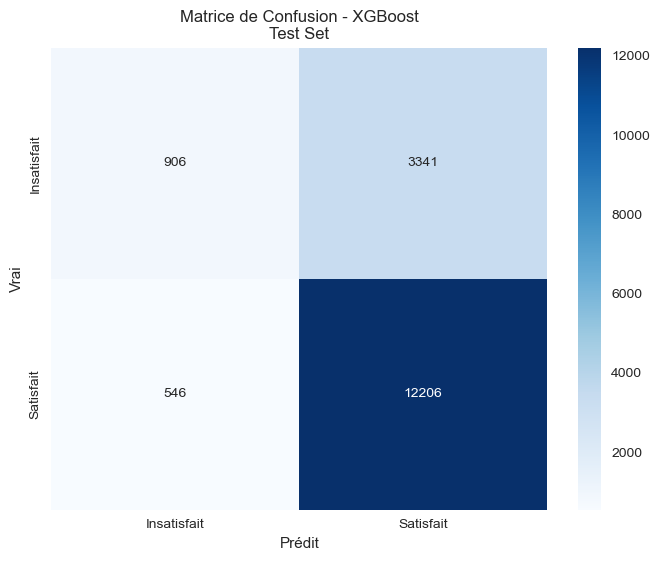

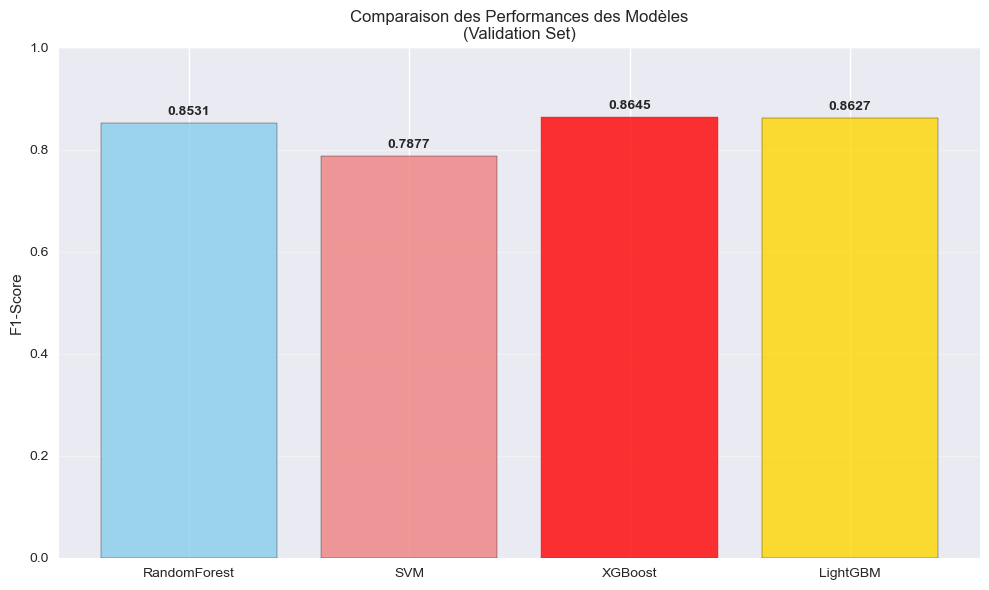

In [29]:
# =============================================================================
# BLOC 8: ÉVALUATION FINALE SUR TEST SET
# Objectif: Évaluer le meilleur modèle sur les données de test
# =============================================================================

print("\n" + "="*60)
print("🧪 ÉVALUATION FINALE SUR TEST SET")
print("="*60)

# Évaluation du meilleur modèle sur le test set
y_test_pred = best_model.predict(X_test_processed)
test_f1 = f1_score(y_test, y_test_pred)

print(f"🎯 Performance de {best_model_name} sur TEST:")
print(f"   📊 F1-score: {test_f1:.4f}")
print(f"   🎯 Précision: {np.mean(y_test_pred == y_test):.4f}")

# Rapport de classification détaillé
print(f"\n📋 Rapport de classification:")
print(classification_report(y_test, y_test_pred, target_names=['Insatisfait', 'Satisfait']))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Insatisfait', 'Satisfait'], 
            yticklabels=['Insatisfait', 'Satisfait'])
plt.title(f'Matrice de Confusion - {best_model_name}\nTest Set')
plt.ylabel('Vrai')
plt.xlabel('Prédit')
plt.show()

# Graphique comparatif des modèles
plt.figure(figsize=(10, 6))
models_list = list(model_scores.keys())
f1_scores = list(model_scores.values())

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
bars = plt.bar(models_list, f1_scores, color=colors, edgecolor='black', alpha=0.8)

# Ajout des valeurs sur les barres
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, 1)
plt.ylabel('F1-Score')
plt.title('Comparaison des Performances des Modèles\n(Validation Set)')
plt.grid(axis='y', alpha=0.3)

# Highlight du meilleur modèle
best_index = models_list.index(best_model_name)
bars[best_index].set_color('red')

plt.tight_layout()
plt.show()

In [31]:
# =============================================================================
# BLOC 9: SAUVEGARDE DES MODÈLES ET PRÉDICTIONS
# Objectif: Sauvegarder XGBoost comme meilleur modèle et créer tous les artefacts
# =============================================================================

print("\n" + "="*60)
print("💾 SAUVEGARDE DES MODÈLES ET PRÉDICTIONS")
print("="*60)

# 1. Sauvegarde du préprocesseur
joblib.dump(preprocessor, "preprocessor.joblib")
print("✅ Preprocesseur sauvegardé: preprocessor.joblib")

# 2. Sauvegarde de XGBoost comme MEILLEUR MODÈLE
best_model_filename = "best_model_XGBoost.joblib"
joblib.dump(best_model, best_model_filename)
print(f"✅ Meilleur modèle sauvegardé: {best_model_filename}")

# 3. Sauvegarde de tous les modèles pour référence
for model_name, model in trained_models.items():
    filename = f"model_{model_name}.joblib"
    joblib.dump(model, filename)
    print(f"✅ {model_name} sauvegardé: {filename}")

# 4. Création et sauvegarde d'un pipeline complet avec XGBoost
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model)  # XGBoost - meilleur modèle
])

joblib.dump(full_pipeline, "pipeline_full.joblib")
print("✅ Pipeline complet sauvegardé: pipeline_full.joblib")

# 5. Ajout des prédictions XGBoost au dataset original
print("\n📊 Ajout des prédictions au dataset...")
df['predicted_target'] = best_model.predict(preprocessor.transform(X))
df['prob_satisfied'] = best_model.predict_proba(preprocessor.transform(X))[:, 1]

# 6. Sauvegarde du dataset avec prédictions
df.to_csv("dataset/final_dataset_with_predictions.csv", index=False)
print("✅ Dataset avec prédictions sauvegardé: dataset/final_dataset_with_predictions.csv")

# 7. Statistiques finales
satisfaction_rate = df['predicted_target'].mean()
accuracy = (df['predicted_target'] == df['target']).mean()

print(f"\n🎯 STATISTIQUES FINALES:")
print(f"   📈 Taux de satisfaction prédit: {satisfaction_rate:.1%}")
print(f"   🎯 Précision globale: {accuracy:.1%}")
print(f"   📊 F1-score sur test: {test_f1:.4f}")

print(f"\n🎉 TOUS LES MODÈLES SAUVEGARDÉS AVEC SUCCÈS!")
print(f"📁 Fichiers créés:")
print(f"   - preprocessor.joblib")
print(f"   - best_model_XGBoost.joblib (🥇 MEILLEUR)")
print(f"   - pipeline_full.joblib")
print(f"   - model_RandomForest.joblib")
print(f"   - model_SVM.joblib") 
print(f"   - model_LightGBM.joblib")
print(f"   - dataset/final_dataset_with_predictions.csv")


💾 SAUVEGARDE DES MODÈLES ET PRÉDICTIONS
✅ Preprocesseur sauvegardé: preprocessor.joblib
✅ Meilleur modèle sauvegardé: best_model_XGBoost.joblib
✅ RandomForest sauvegardé: model_RandomForest.joblib
✅ SVM sauvegardé: model_SVM.joblib
✅ XGBoost sauvegardé: model_XGBoost.joblib
✅ LightGBM sauvegardé: model_LightGBM.joblib
✅ Pipeline complet sauvegardé: pipeline_full.joblib

📊 Ajout des prédictions au dataset...
✅ Dataset avec prédictions sauvegardé: dataset/final_dataset_with_predictions.csv

🎯 STATISTIQUES FINALES:
   📈 Taux de satisfaction prédit: 79.7%
   🎯 Précision globale: 74.6%
   📊 F1-score sur test: 0.8626

🎉 TOUS LES MODÈLES SAUVEGARDÉS AVEC SUCCÈS!
📁 Fichiers créés:
   - preprocessor.joblib
   - best_model_XGBoost.joblib (🥇 MEILLEUR)
   - pipeline_full.joblib
   - model_RandomForest.joblib
   - model_SVM.joblib
   - model_LightGBM.joblib
   - dataset/final_dataset_with_predictions.csv


In [ ]:
# =============================================================================
# BLOC 10: FONCTION DE PRÉDICTION CORRIGÉE
# Objectif: Créer une fonction robuste pour prédire sur nouvelles données
# =============================================================================

print("\n" + "="*60)
print("🔮 FONCTION DE PRÉDICTION POUR NOUVELLES DONNÉES")
print("="*60)

def predict_new_data(sample_data, preprocessor, model):
    """
    Prédit la satisfaction client pour de nouvelles données
    
    Args:
        sample_data (DataFrame): Nouvelles données à prédire
        preprocessor: Préprocesseur entraîné
        model: Modèle entraîné
    
    Returns:
        DataFrame: Données avec prédictions ajoutées
    """
    
    # Vérifier que sample_data est un DataFrame
    if not isinstance(sample_data, pd.DataFrame):
        raise ValueError("sample_data doit être un DataFrame pandas")
    
    print(f"🔮 Prédiction sur {len(sample_data)} nouvelles observations...")
    
    # Créer un DataFrame avec toutes les colonnes attendues
    X_new = pd.DataFrame(columns=X_train.columns)
    
    # Remplir avec les données fournies
    for col in sample_data.columns:
        if col in X_new.columns:
            X_new[col] = sample_data[col]
    
    # Remplir les colonnes manquantes avec des valeurs par défaut
    for col in X_new.columns:
        if col not in sample_data.columns:
            if X_train[col].dtype in ['int64', 'float64']:
                X_new[col] = X_train[col].median()  # Valeur médiane pour numériques
            else:
                X_new[col] = '__other__'  # Valeur par défaut pour catégorielles
    
    # Appliquer la réduction de cardinalité
    X_new = reduce_cardinality(X_new, categorical_cols, top_k=20)
    
    # Transformation et prédiction
    X_new_trans = preprocessor.transform(X_new)
    predictions = model.predict(X_new_trans)
    probabilities = model.predict_proba(X_new_trans)[:, 1]
    
    # Ajouter les résultats aux données originales
    result_df = sample_data.copy()
    result_df['predicted_target'] = predictions
    result_df['probability_satisfaction'] = probabilities
    result_df['satisfaction_status'] = ['Satisfait' if p == 1 else 'Insatisfait' for p in predictions]
    
    print(f"✅ Prédictions terminées: {np.sum(predictions==1)} satisfaits, {np.sum(predictions==0)} insatisfaits")
    
    return result_df

# Test de la fonction avec des données de test
print("\n🧪 Test de la fonction de prédiction...")
test_sample = X_test.head(3).copy()
predictions_result = predict_new_data(test_sample, preprocessor, best_model)

print("\n📋 Résultats de prédiction:")
print(predictions_result[['predicted_target', 'probability_satisfaction', 'satisfaction_status']])

print("\n🎯 CODE NOTEBOOK COMPLÈTEMENT CORRIGÉ ET OPÉRATIONNEL!")


🔮 FONCTION DE PRÉDICTION POUR NOUVELLES DONNÉES

🧪 Test de la fonction de prédiction...
🔮 Prédiction sur 3 nouvelles observations...
✅ Prédictions terminées: 2 satisfaits, 1 insatisfaits

📋 Résultats de prédiction:
        predicted_target  probability_satisfaction satisfaction_status
112560                 0                  0.438429         Insatisfait
94027                  1                  0.883981           Satisfait
11284                  1                  0.801868           Satisfait

🎯 CODE NOTEBOOK COMPLÈTEMENT CORRIGÉ ET OPÉRATIONNEL!
